In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [4]:
# iris 데이터셋 로드
iris = load_iris()

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = iris['data']
data[-5:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [7]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df_iris['target'] = target

In [13]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

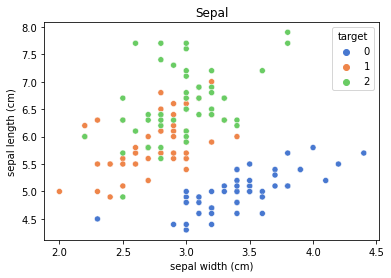

In [15]:
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.title('Sepal')
plt.show()
#'petal length (cm)', 'petal width (cm)',

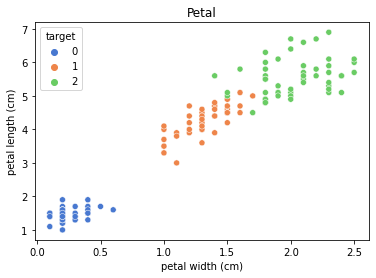

In [16]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.title('Petal')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_iris.drop('target', axis=1)

In [19]:
y = df_iris['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [22]:
X_test.shape, y_test.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

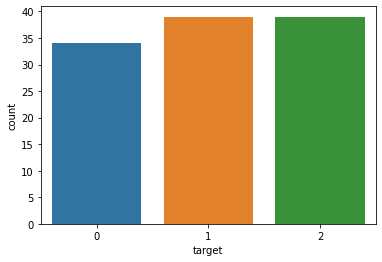

In [23]:
sns.countplot(y_train)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

<AxesSubplot:xlabel='target', ylabel='count'>

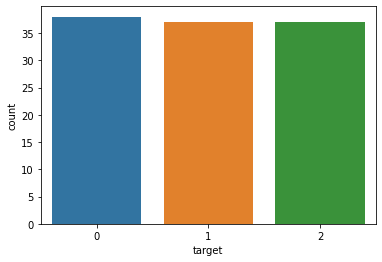

In [25]:
sns.countplot(y_train)

In [26]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [27]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(random_state=0)

In [30]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
pred_dtc = model_dtc.predict(X_test)
pred_dtc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [32]:
(pred_dtc == y_test).mean()

0.9736842105263158

In [33]:
pred_dtc[:5]

array([1, 1, 2, 2, 2])

In [34]:
y_test[:5].values

array([1, 1, 2, 2, 2])

In [97]:
from sklearn.tree import export_graphviz # sudo apt install python-pydot python-pydot-ng graphviz 우분투에는 이렇게 설치
from subprocess import call

In [98]:
from IPython.display import Image
def graph_tree(model):
    # .dot 파일로 export 함
    export_graphviz(model, out_file='tree.dot')
    # 생성된 .dot 파일을 .png로 변환
    call(['dot', '-Tpng', '/home/ubuntu/aiml/classs_data/ml실습자료_지도학습/tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])
    # .png 출력
    return Image(filename = 'decistion-tree.png', width=600)

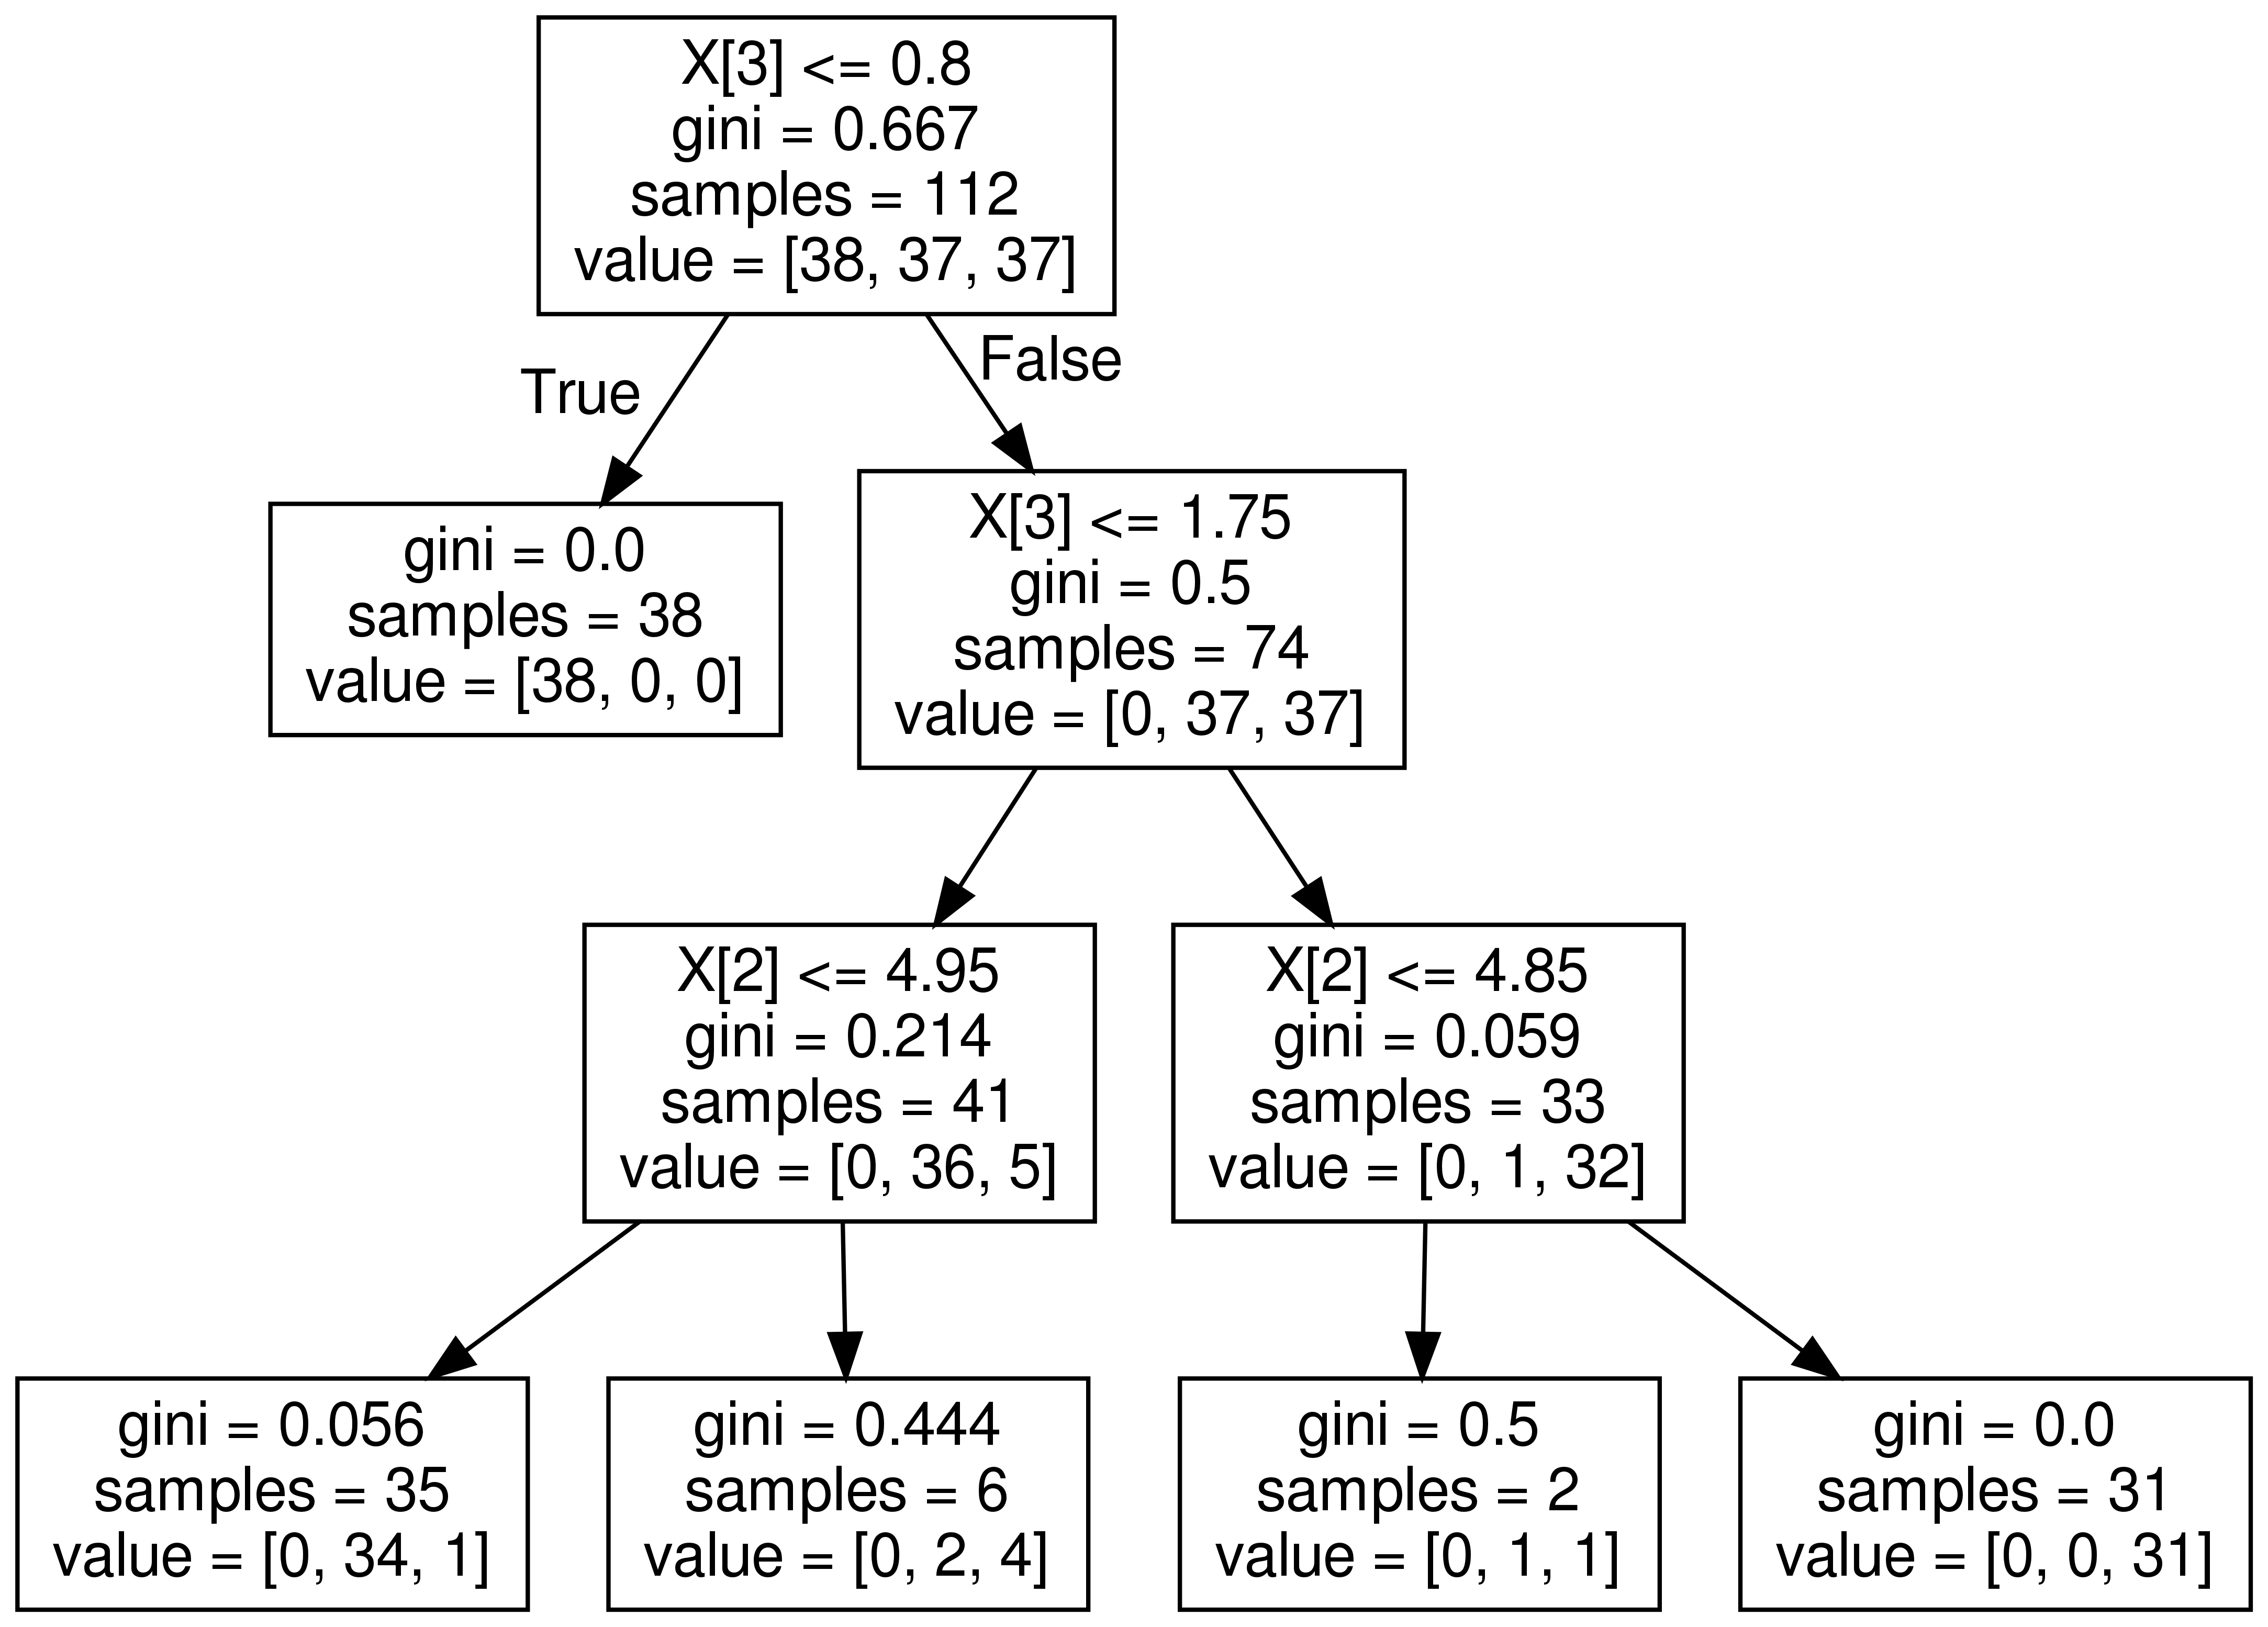

In [99]:
graph_tree(model_dtc)

In [100]:
# max_depth=3으로 설정
model_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc.fit(X_train, y_train)
pred_dtc = model_dtc.predict(X_test)

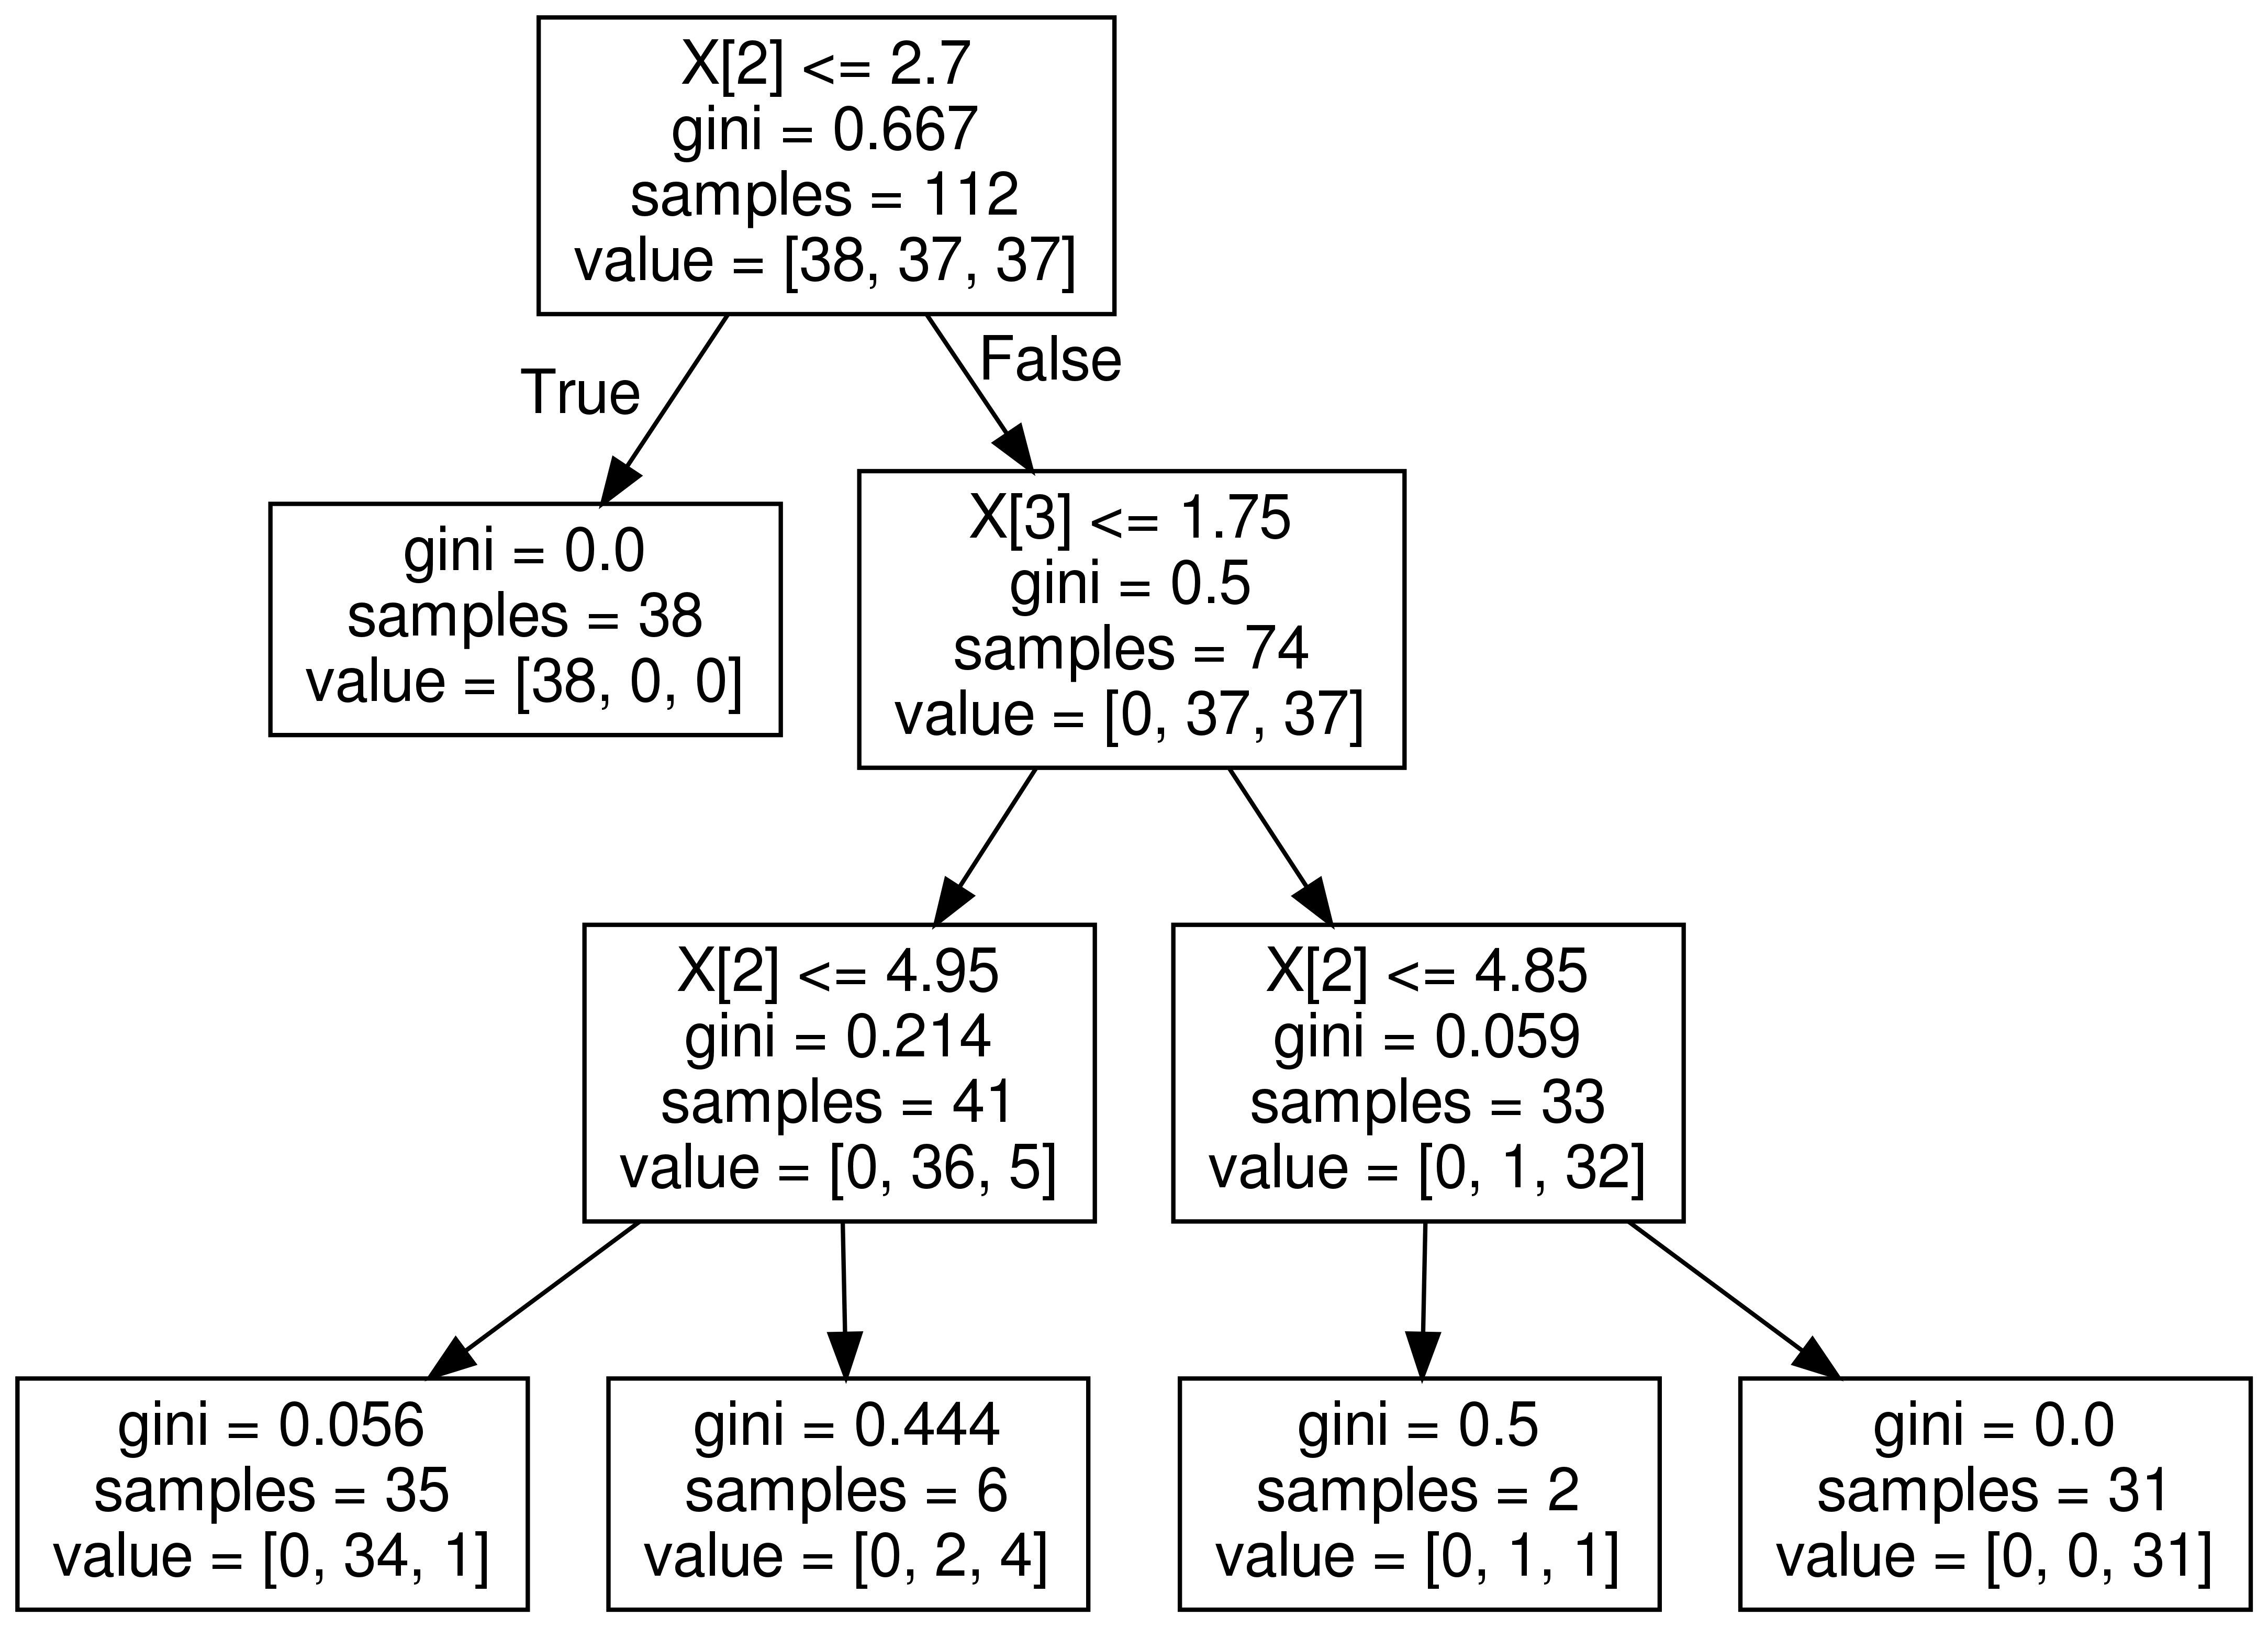

In [101]:
graph_tree(model_dtc)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model_lr = LogisticRegression()

In [67]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [68]:
pred_lr = model_lr.predict(X_test)

In [69]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

In [71]:
(pred_lr == y_test).mean()

1.0

In [72]:
from sklearn.linear_model import SGDClassifier

In [73]:
model_sgd = SGDClassifier()

In [74]:
model_sgd.fit(X_train, y_train)

SGDClassifier()

In [75]:
pred_sgd = model_sgd.predict(X_test)
pred_sgd

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [76]:
(pred_sgd == y_test).mean()

0.6578947368421053

In [77]:
model_sgd = SGDClassifier(penalty='elasticnet', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd

SGDClassifier(n_jobs=-1, penalty='elasticnet', random_state=20)

In [78]:
model_sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, penalty='elasticnet', random_state=20)

In [79]:
pred_sgd = model_sgd.predict(X_test)

In [80]:
(pred_sgd == y_test).mean()

0.868421052631579

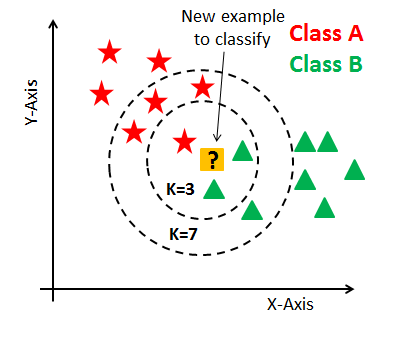

In [81]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model_knc = KNeighborsClassifier()
model_knc  # n_neighbors=5 일반적으로 홀수 값으로 설정

KNeighborsClassifier()

In [84]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
pred_knc = model_knc.predict(X_test)

In [86]:
(pred_knc == y_test).mean()

1.0

In [87]:
model_knc = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
model_knc.fit(X_train, y_train)
knc_pred = model_knc.predict(X_test)
print(y_test.values)
print(knc_pred)

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


In [88]:
(knc_pred == y_test).mean()

1.0

In [89]:
from sklearn.svm import SVC

In [90]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, kernel='linear')

In [91]:
model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [92]:
pred_svc = model_svc.predict(X_test)

In [93]:
pred_svc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [94]:
(pred_svc == y_test).mean()

1.0

In [95]:
pred_svc[:5]

array([1, 1, 2, 2, 2])

In [96]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[-0.23926426,  2.28023685,  0.75592725],
       [-0.23873309,  2.25788457,  0.84262294],
       [-0.2664893 ,  1.18041355,  2.24577395],
       [-0.27962692,  1.18000795,  2.26709796],
       [-0.27749846,  0.83443234,  2.28541916]])